# ⚑ Importing Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Models Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

# ⚑ Reading and exploring the dataset

In [2]:
data = pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')

In [3]:
data.shape # Dimensions (rows, columns)

(6362620, 11)

In [4]:
data.head(10) # first 10 rows/records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
data.tail(10) # last 10 rows/records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

# ⚑ Handling Missing Values

In [7]:
if data.isnull().values.any():
    print('Unfortunately, there are missing values in the dataset\n')
    data.dropna(inplace=True)
    print('Shape : ', data.shape) 
else:
    print('Fortunately, there aren\'t missing values in the dataset.')

Fortunately, there aren't missing values in the dataset.


# ⚑ Handling Outliers

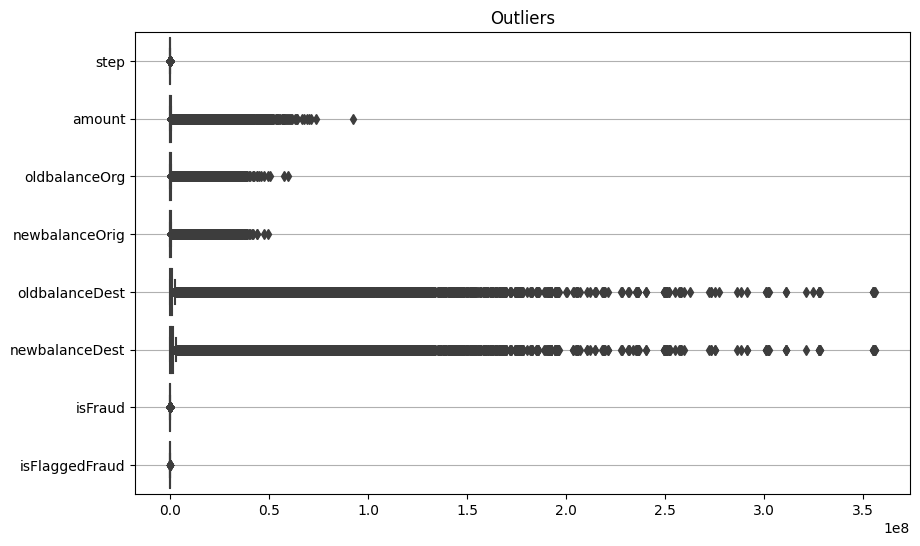

In [8]:
# Outliers = Unusual Values قيم متطرفة

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h') # horizontal
plt.title('Outliers')
plt.grid(axis='y')
plt.show()

In [9]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# ⚑ Analysis and exploration of categories of the "type" feature

In [10]:
# check labels in "type" feature
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

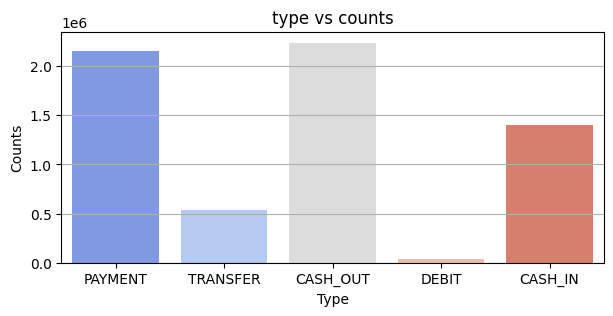

In [12]:
plt.figure(figsize=(7,3))
plt.title('type vs counts')
sns.countplot(data=data,x='type',palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=1)
plt.show()

# ⚑ Label Encoding

In [13]:
data['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)

In [14]:
data['type'].value_counts()

type
0    2237500
1    2151495
2    1399284
3     532909
4      41432
Name: count, dtype: int64

In [15]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# ⚑ Analysis and exploration of categories of the "isFraud" feature

In [16]:
# check labels in "isFraud" feature
data['isFraud'].unique()

array([0, 1])

In [17]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

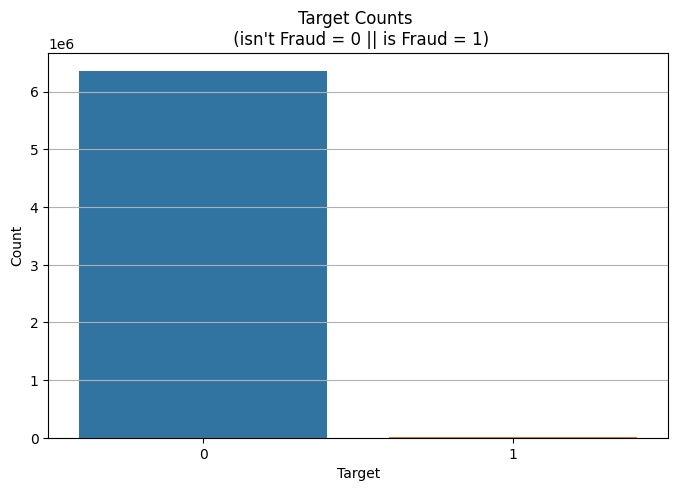

In [18]:
Target_counts = data['isFraud'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=Target_counts.index, y=Target_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counts \n (isn\'t Fraud = 0 || is Fraud = 1)')
plt.xticks()
plt.grid(axis='y')
plt.show()

# ⚑ Dropping unnecessary features

In [19]:
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [20]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [21]:
data.shape # (rows, columns)

(6362620, 9)

# ⚑ Feature Extraction

In [22]:
# The correlation between features
# Understanding the correlation between various features in the dataset
# Select only the numeric columns

data.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.012627,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.012627,1.000000,0.198987,0.260418,0.270669,0.066255,0.079111,0.016171,0.003144
amount,0.022373,0.198987,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,0.260418,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,0.270669,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.066255,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.079111,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.016171,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.003144,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


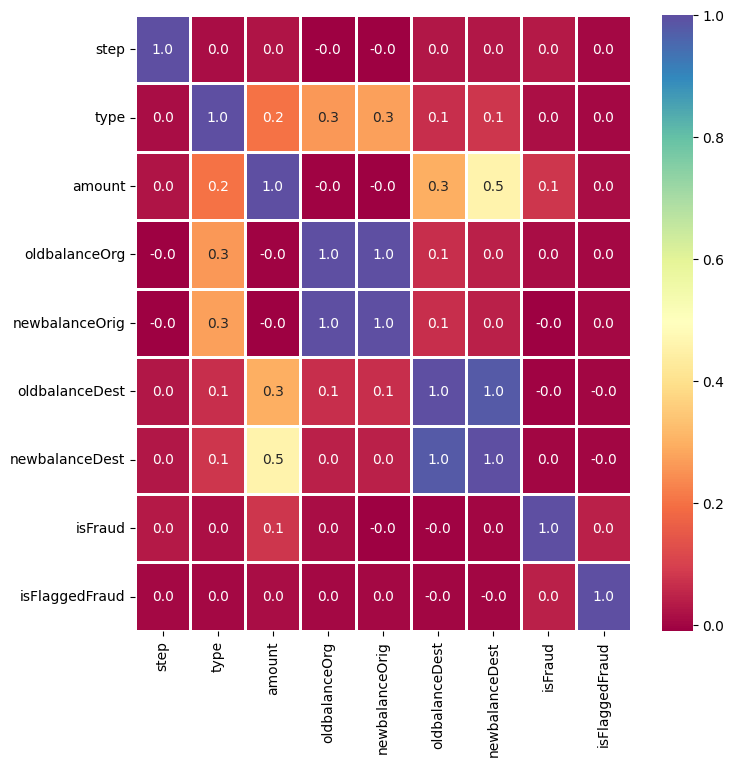

In [23]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=0.9, fmt=".1f", cmap='Spectral')
plt.show()

# ⚑ Correlation between <b>oldbalanceOrg</b> and <b>newbalanceOrig</b> = (0.99)

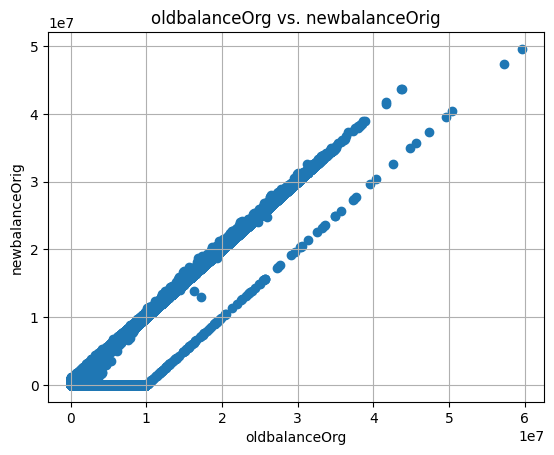

In [24]:
plt.scatter(data['oldbalanceOrg'], data['newbalanceOrig'], label='Data')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.title('oldbalanceOrg vs. newbalanceOrig')
plt.grid(True)
plt.show()

# ⚑ Dropping unnecessary features based on correlation

In [25]:
data.drop(['isFlaggedFraud', 'step'], axis=1, inplace=True)

In [26]:
data.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [27]:
data.shape

(6362620, 7)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
dtypes: float64(5), int64(2)
memory usage: 339.8 MB


In [29]:
data.head() # Default : first 5 rows

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,3,181.00,181.0,0.00,0.0,0.0,1
3,0,181.00,181.0,0.00,21182.0,0.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [30]:
data.tail() # Default : last 5 rows

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6362615,0,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,3,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,0,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,3,850002.52,850002.52,0.0,0.00,0.00,1
6362619,0,850002.52,850002.52,0.0,6510099.11,7360101.63,1


In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
type,6362620.0,1.055307e+00,9.808966e-01,0.0,0.00,1.000,2.000000e+00,4.000000e+00
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [32]:
data.shape # (rows, columns)

(6362620, 7)

# ⚑ Splitting the data and target

In [33]:
# X Data
X = data.drop(['isFraud'], axis=1)
print('X shape is : ' , X.shape)
print()

# y Data
y = data['isFraud']
print('y shape is : ' , y.shape)

X shape is :  (6362620, 6)

y shape is :  (6362620,)


# ⚑ Data Partitioning / Train Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4453834, 6)
X_test shape is  (1908786, 6)
y_train shape is  (4453834,)
y_test shape is  (1908786,)


# ⚑ Data Scaling / Feature Scaling

In [35]:
# Standardization (Z-Score Normalization) 
# StandardScaler for Data

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ⚑ Applying "Logistic Regression" Algorithm

In [36]:
Model_LR = LogisticRegression()
Model_LR.fit(X_train_scaled, y_train)
y_pred_LR = Model_LR.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_LR.score(X_train_scaled, y_train)
Test_Accuracy = Model_LR.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.92 %
Testing accuracy: 99.92 %


# ⚑ The Evaluation

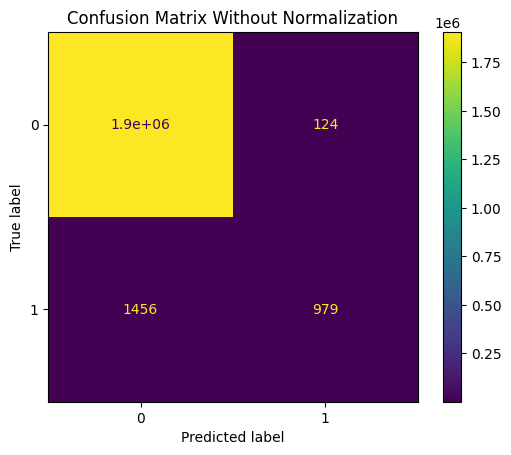

In [37]:
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_LR)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [38]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.89      0.40      0.55      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.70      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786



In [39]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f'➤➤➤ Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_pred_LR)
print(f'➤➤➤ Precision Score : {Precision_LR * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_pred_LR)
print(f'➤➤➤ Recall Score : {Recall_LR * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_pred_LR)
print(f'➤➤➤ F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred_LR)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.92 %

➤➤➤ Precision Score :  88.76 %

➤➤➤ Recall Score :  40.21 %

➤➤➤ F1 Score :  55.34 %

➤➤➤ AUC_ROC :  70.10 %



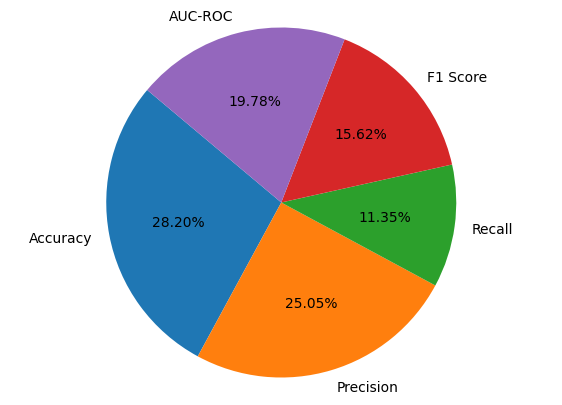

In [40]:
Scores = [Accuracy_LR, Precision_LR, Recall_LR, F1_Score_LR, ROC_AUC_LR]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

# ⚑ Applying "Decision Tree" Algorithm

In [41]:
Model_DT = DecisionTreeClassifier()
Model_DT.fit(X_train_scaled, y_train)
y_pred_DT = Model_DT.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_DT.score(X_train_scaled, y_train)
Test_Accuracy = Model_DT.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 100.00 %
Testing accuracy: 99.97 %


# ⚑ The Evaluation

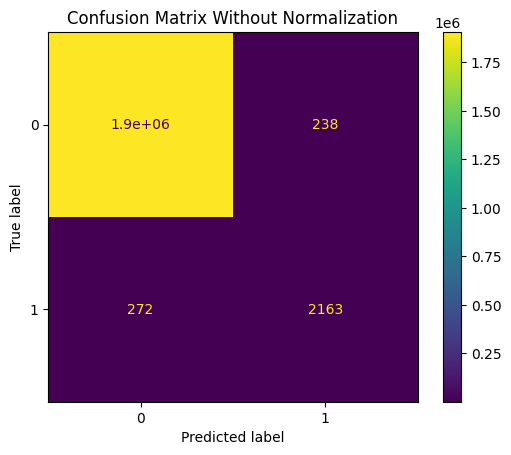

In [42]:
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_DT)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [43]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.90      0.89      0.89      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.94      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786



In [44]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'➤➤➤ Accuracy Score : {Accuracy_DT * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_DT = precision_score(y_test, y_pred_DT)
print(f'➤➤➤ Precision Score : {Precision_DT * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_DT = recall_score(y_test, y_pred_DT)
print(f'➤➤➤ Recall Score : {Recall_DT * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_DT = f1_score(y_test, y_pred_DT)
print(f'➤➤➤ F1 Score : {F1_Score_DT * 100 : .2f} %\n')


ROC_AUC_DT = roc_auc_score(y_test, y_pred_DT)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_DT * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.97 %

➤➤➤ Precision Score :  90.09 %

➤➤➤ Recall Score :  88.83 %

➤➤➤ F1 Score :  89.45 %

➤➤➤ AUC_ROC :  94.41 %



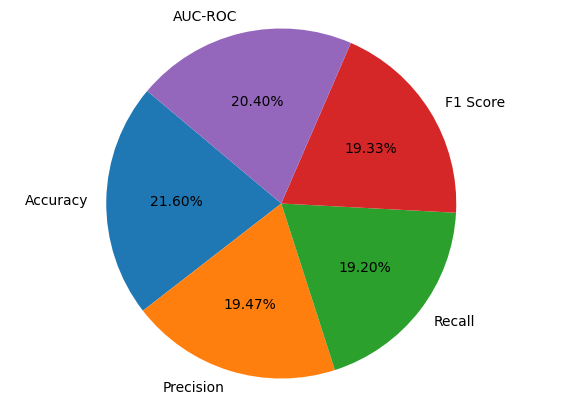

In [45]:
Scores = [Accuracy_DT, Precision_DT, Recall_DT, F1_Score_DT, ROC_AUC_DT]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

# ⚑ Applying "Naive Bayes" Algorithm

In [46]:
Model_NB = GaussianNB()
Model_NB.fit(X_train_scaled, y_train)
y_pred_NB = Model_NB.predict(X_test_scaled)

# Quick evaluation
Train_Accuracy = Model_NB.score(X_train_scaled, y_train)
Test_Accuracy = Model_NB.score(X_test_scaled, y_test)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Testing accuracy: {Test_Accuracy*100:.2f} %')

Training accuracy: 99.17 %
Testing accuracy: 99.17 %


# ⚑ The Evaluation

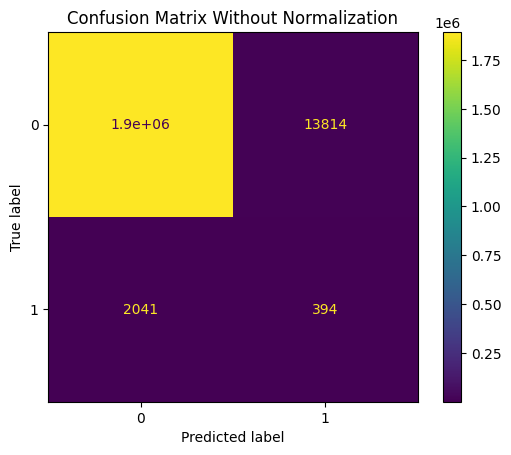

In [47]:
# Confusion Matrix

CM = confusion_matrix(y_true=y_test, y_pred=y_pred_NB)
ConfusionMatrixDisplay(CM, display_labels=data['isFraud'].unique()).plot()
plt.title('Confusion Matrix Without Normalization')
plt.show()

In [48]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906351
           1       0.03      0.16      0.05      2435

    accuracy                           0.99   1908786
   macro avg       0.51      0.58      0.52   1908786
weighted avg       1.00      0.99      0.99   1908786



In [49]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f'➤➤➤ Accuracy Score : {Accuracy_NB * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_NB = precision_score(y_test, y_pred_NB)
print(f'➤➤➤ Precision Score : {Precision_NB * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_NB = recall_score(y_test, y_pred_NB)
print(f'➤➤➤ Recall Score : {Recall_NB * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_NB = f1_score(y_test, y_pred_NB)
print(f'➤➤➤ F1 Score : {F1_Score_NB * 100 : .2f} %\n')


ROC_AUC_NB = roc_auc_score(y_test, y_pred_NB)
print(f'➤➤➤ AUC_ROC : {ROC_AUC_NB * 100 : .2f} %\n')

➤➤➤ Accuracy Score :  99.17 %

➤➤➤ Precision Score :  2.77 %

➤➤➤ Recall Score :  16.18 %

➤➤➤ F1 Score :  4.73 %

➤➤➤ AUC_ROC :  57.73 %



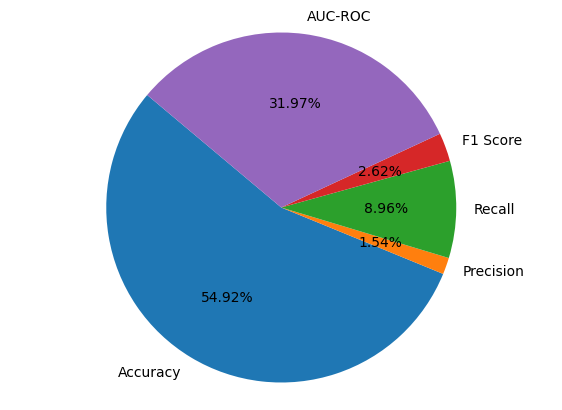

In [50]:
Scores = [Accuracy_NB, Precision_NB, Recall_NB, F1_Score_NB, ROC_AUC_NB]
Score_Names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

# Plot
plt.figure(figsize=(7, 5))
plt.pie(Scores, labels=Score_Names, autopct='%1.2f%%', startangle=140)
plt.axis('equal')
plt.show()

In [51]:
evaluation = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree', 'Naive Bayes'],
                           'Accuracy': [(Accuracy_LR*100), (Accuracy_DT*100), (Accuracy_NB*100)]})

evaluation

,Model,Accuracy
0,Logistic Regression,99.917225
1,Decision Tree,99.973281
2,Naive Bayes,99.169367
